In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df_housing = pd.read_csv("housing.csv")
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df_housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Chú thích dữ liệu:
1. longitude: Thước đo khoảng cách về phía tây của ngôi nhà
2. latitude: Thước đo về phía bắc của ngôi nhà
3. housing_median_age: Tuổi trung bình của ngôi nhà
4. total_rooms: Tổng số phòng trong 1 khối
5. total_bedrooms: Tổng số phòng ngủ
6. households: Tổng số hộ gia đình
7. median_income: Thu nhập trung bình
8. median_house_value: Giá trị trung bình của các hộ gia đình
9. ocean_proximity: Vị trí của ngôi nhà
10. population: Dân số

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt

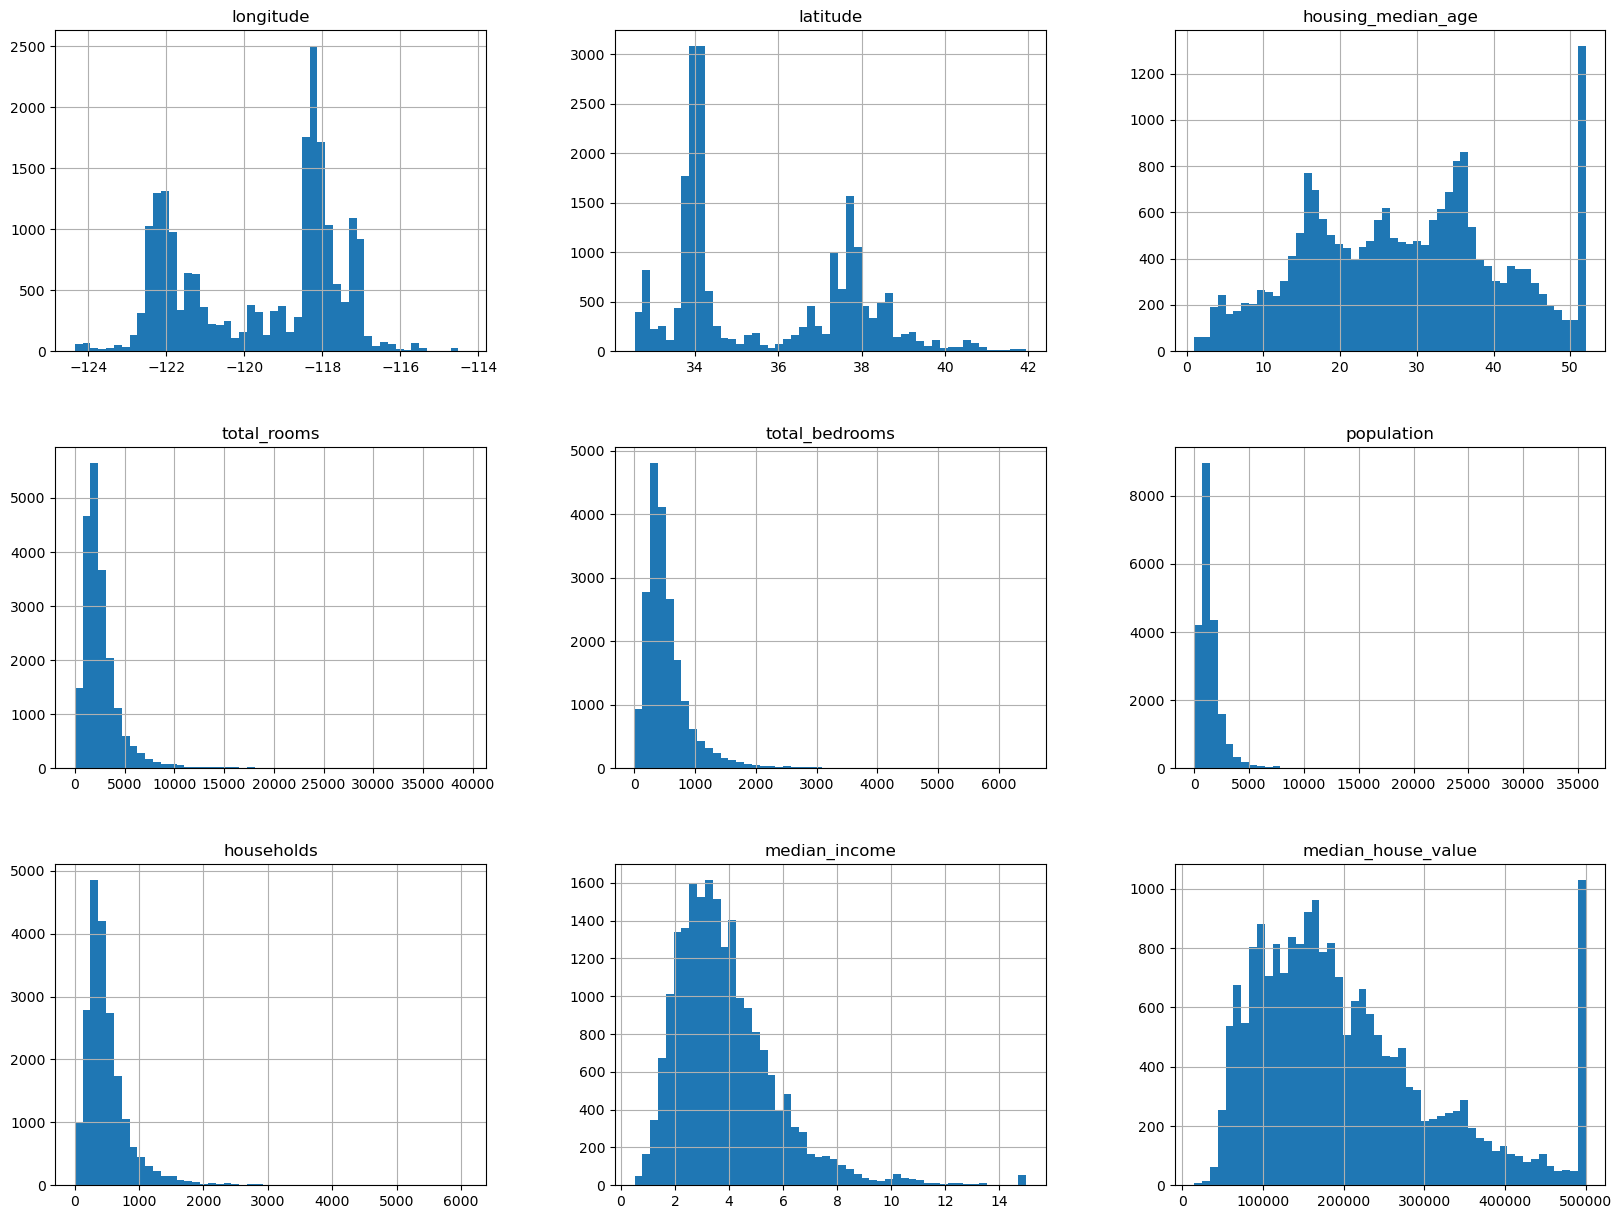

In [7]:
df_housing.hist(bins=50, figsize=(20, 15))
plt.show()

# Clean data

In [8]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Trực quan hóa dữ liệu 
![California Map](https://www.google.com/maps/vt/data=FygtGdqcrReA93UsOmO8ikVrTePX7GKj97TYWUC447miqqiLQv7NFB0h2-3HJK9oKdwGHRhXOoeWWCvz_JMJaBYcfe4a4iASwSeUXvvm66zYyzdGNo1buzZ1cP1vGQRaWwxhns2NkW_0y-kXmZ2Nwnti8VEQWlchrIrsQEo-gcdLceAFvPyRffY3PGMDaW7zvSid0bBjLHRBHkDfICCi7ZIJLsZvclJq3roTAJg5aeRMkP_-CRYCMHympBOd)

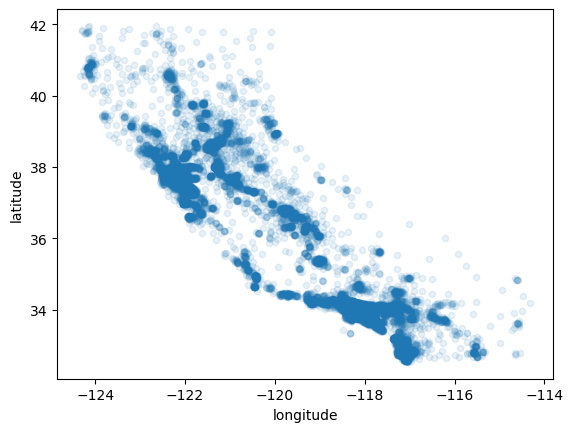

In [18]:
x = df_housing['latitude']
y = df_housing['latitude']
df_housing.plot(kind='scatter' , x='longitude' , y='latitude' , alpha = 0.1);

# Tìm ra mối liên quan giữa dân cư và địa lí

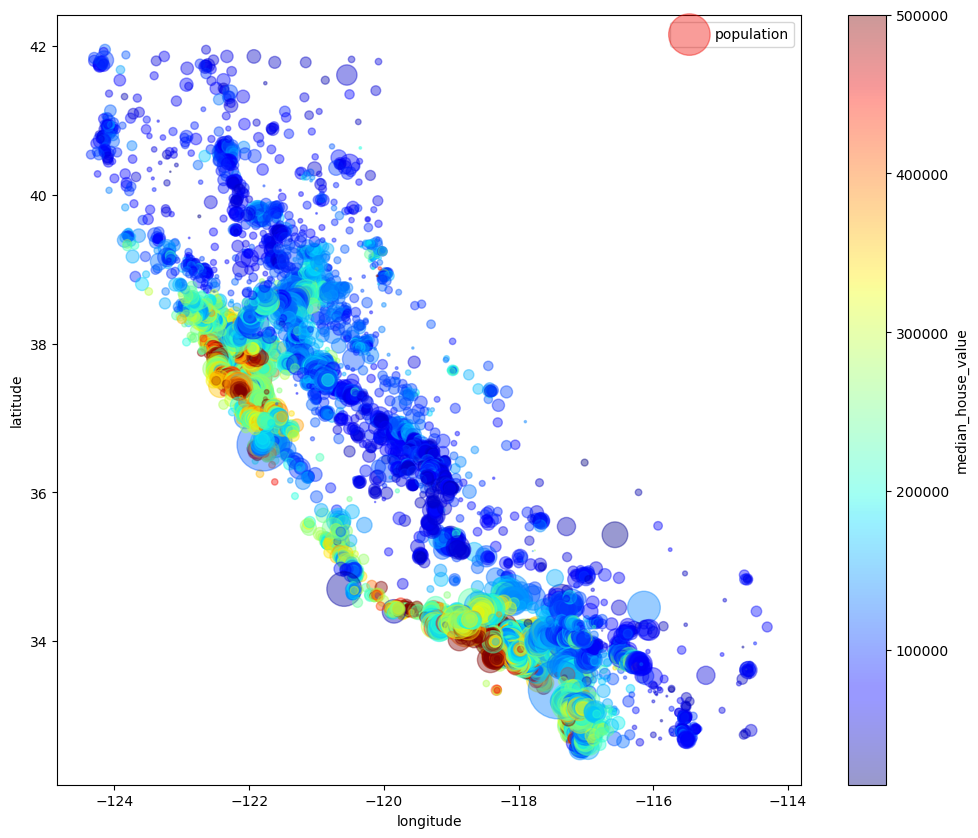

In [23]:
df_housing.plot(kind='scatter' , x='longitude' , y='latitude' , alpha = 0.4 , s=df_housing['population'] / 20 , label='population' ,
                figsize=(12,10) , c='median_house_value' , cmap=plt.get_cmap('jet') , colorbar=True);

# Tính toán ma trận tương quan
Ý nghĩa: Nếu hệ số tương quan gần tới 1 thì nó đồng nghĩa với việc tương quan như: nếu a tăng thì b tăng và ngược lại

In [24]:
corr_mattrix = df_housing.corr()

In [25]:
corr_mattrix['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

# Cleaning data

In [27]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [28]:
np_arr = np.array(df_housing['total_bedrooms'])
np_arr

array([ 129., 1106.,  190., ...,  485.,  409.,  616.])

In [29]:
np_arr = np_arr[~np.isnan(np_arr)]

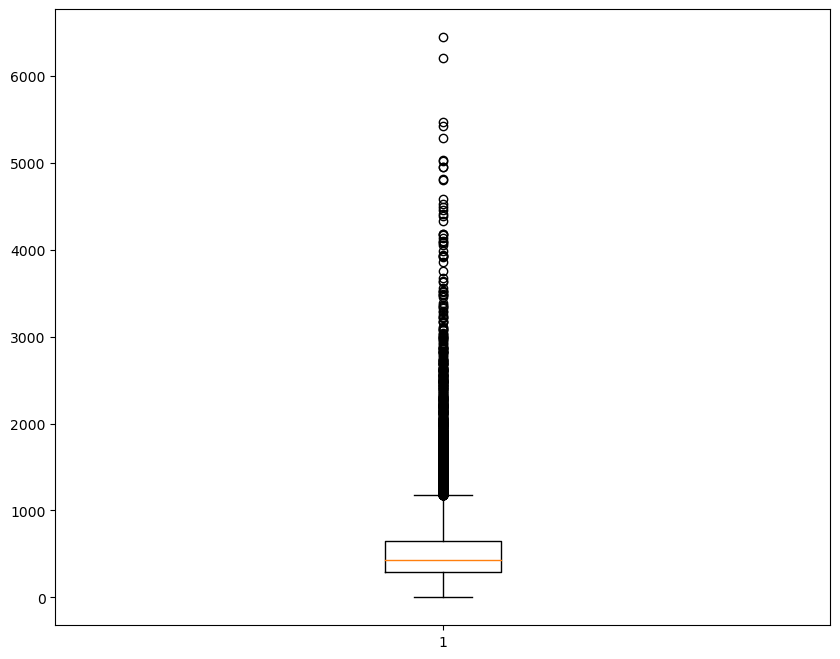

In [31]:
fig = plt.figure(figsize=(10,8))
plt.boxplot(np_arr)
plt.show();

In [32]:
df_housing['total_bedrooms'].median()

435.0

In [33]:
df_housing['total_bedrooms'] = df_housing['total_bedrooms'].fillna(df_housing['total_bedrooms'].mean())

In [35]:
df_housing['total_bedrooms'].value_counts()

537.870553     207
280.000000      55
331.000000      51
345.000000      50
343.000000      49
              ... 
2961.000000      1
1915.000000      1
1215.000000      1
3298.000000      1
1052.000000      1
Name: total_bedrooms, Length: 1924, dtype: int64

In [36]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
df_housing['room_per_househholds'] = df_housing['total_rooms'] / df_housing['households']

df_housing['bedroom_per_households'] = df_housing['total_bedrooms'] / df_housing['households']

df_housing['population_per_households'] = df_housing['population'] / df_housing['households']

In [39]:
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,room_per_househholds,bedroom_per_households,population_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,1.023810,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.971880,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081,2.181467


# Hệ số tương quan với dữ liệu mới

In [41]:
corr_mattrix_new = df_housing.corr()
corr_mattrix_new['median_house_value'].sort_values()

latitude                    -0.144160
longitude                   -0.045967
bedroom_per_households      -0.044265
population                  -0.024650
population_per_households   -0.023737
total_bedrooms               0.049454
households                   0.065843
housing_median_age           0.105623
total_rooms                  0.134153
room_per_househholds         0.151948
median_income                0.688075
median_house_value           1.000000
Name: median_house_value, dtype: float64

# Text to category

In [42]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  20640 non-null  float64
 1   latitude                   20640 non-null  float64
 2   housing_median_age         20640 non-null  float64
 3   total_rooms                20640 non-null  float64
 4   total_bedrooms             20640 non-null  float64
 5   population                 20640 non-null  float64
 6   households                 20640 non-null  float64
 7   median_income              20640 non-null  float64
 8   median_house_value         20640 non-null  float64
 9   ocean_proximity            20640 non-null  object 
 10  room_per_househholds       20640 non-null  float64
 11  bedroom_per_households     20640 non-null  float64
 12  population_per_households  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ M

In [45]:
df_housing = pd.get_dummies(df_housing,prefix=['ocean_proximity'] , columns=['ocean_proximity'] , drop_first=True)
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_per_househholds,bedroom_per_households,population_per_households,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,1.023810,2.555556,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.971880,2.109842,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,1.073446,2.802260,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,1.073059,2.547945,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,1.081081,2.181467,0,0,1,0


# Scale Data

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()
# Xóa đi cột median_house_value: đây là cột target
housing_features = df_housing.drop('median_house_value' , axis=1)
# Vừa fit data vừa transform data về theo dạng Min-max scaler
x_data = scaler.fit_transform(housing_features)
x_data.shape

(20640, 15)

In [54]:
y_data = np.array(df_housing['median_house_value'])
y_data = y_data.reshape(y_data.shape[0] , 1)
y_data.shape

(20640, 1)

# Cắt dữ liệu để train

In [55]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x_data , y_data , test_size=0.2 , random_state=42)

In [56]:
x_train.shape

(16512, 15)

In [57]:
x_test.shape

(4128, 15)

In [58]:
y_train.shape

(16512, 1)

# Linear regression

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train,y_train)
reg.score(x_train,y_train)

0.6527291237275095

In [60]:
reg.coef_

array([[ -281259.73555929,  -250802.81436461,    56506.0555756 ,
          -89095.89480186,   270780.99871291, -1400647.84765017,
          589824.19612986,   596148.01064453,  -693627.73184544,
         1295867.21398913,    77621.88506129,   -37060.18052873,
          130242.458375  ,    -5304.92135195,     3012.98207801]])

In [61]:
reg.intercept_

array([242910.78751364])

In [62]:
reg.predict(x_test)

array([[ 72210.24095142],
       [135305.79635062],
       [279082.4098308 ],
       ...,
       [442160.86684822],
       [119051.30581628],
       [185565.52484854]])

In [63]:
y_pred = reg.predict(x_test)

# Hàm đánh giá

In [64]:
from sklearn.metrics import mean_squared_error
def rmse_error(y_pred , y_test):
    mse_error = mean_squared_error(y_pred , y_test)
    return np.sqrt(mse_error)

In [65]:
rmse_error(y_pred , y_test)

75070.18863624617